# **Global Superstore**

## Objectives

* The global superstore dataset was shared over a Git-hub repository after mining its data out from SQL records. I aim to feature engineer the data and prepare it for analysis.

## Inputs

* Global_superstore.csv 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Global_Superstore_Hackathon1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Global_Superstore_Hackathon1'

# Section 1

Importing the needed libraries

In [4]:
!pip3 install pandas numpy matplotlib seaborn plotly


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---

# Data Cleaning & Preparation

- Show the row data
- Fill missing values
- Make sure data types are correct
- create new columns to show more valuable data
- Show the data after preparation


In [32]:
global_store_df = pd.read_csv('Global_Superstore.csv')
global_store_df = global_store_df.head(50)
print(global_store_df.shape)
global_store_df.head(10)

(50, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical
5,22732,IN-2014-JM156557-41818,6/28/2014,7/1/2014,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,897.35,Critical
6,30570,IN-2012-TS2134092-41219,11/6/2012,11/8/2012,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,894.77,Critical
7,31192,IN-2013-MB1808592-41378,4/14/2013,4/18/2013,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High
8,40099,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,36258,CA-2012-AB10015140-40974,3/6/2012,3/7/2012,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High


In [33]:
global_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          50 non-null     int64  
 1   Order ID        50 non-null     object 
 2   Order Date      50 non-null     object 
 3   Ship Date       50 non-null     object 
 4   Ship Mode       50 non-null     object 
 5   Customer ID     50 non-null     object 
 6   Customer Name   50 non-null     object 
 7   Segment         50 non-null     object 
 8   Postal Code     12 non-null     float64
 9   City            50 non-null     object 
 10  State           50 non-null     object 
 11  Country         50 non-null     object 
 12  Region          50 non-null     object 
 13  Market          50 non-null     object 
 14  Product ID      50 non-null     object 
 15  Category        50 non-null     object 
 16  Sub-Category    50 non-null     object 
 17  Product Name    50 non-null     objec

In [38]:
#convert order datae and ship date columns type to date
global_store_df['Order Date'] = pd.to_datetime(global_store_df['Order Date'])
global_store_df['Ship Date'] = pd.to_datetime(global_store_df['Ship Date'])

# fill the empty values in postal code col with Unknown
global_store_df['Postal Code'].fillna('Unknown', inplace=True)

#drop row that don't have a customer id value
global_store_df.dropna(subset=['Customer ID'], inplace=True)

#make sure no empty spaces in the city names
global_store_df['City'] = global_store_df['City'].str.strip().str.title()

#drop any dublicated rows
global_store_df = global_store_df.drop_duplicates()
# convert categorical columns to the type category 
categorical_columns = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region', 'Market']
for col in categorical_columns:
    global_store_df[col] = global_store_df[col].astype('category')

In [39]:
#create new columns
global_store_df['Shipping Duration'] = (global_store_df['Ship Date'] - global_store_df['Order Date']).dt.days
global_store_df['Profit Margin'] = (global_store_df['Profit'] / global_store_df['Sales']) * 100

In [40]:
#Checkup the numerical columns values
global_store_df[['Sales', 'Profit', 'Shipping Cost', 'Shipping Duration', 'Profit Margin']].describe()

,Sales,Profit,Shipping Cost,Shipping Duration,Profit Margin
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2533.531200,567.154800,575.510440,2.300000,20.766522
std,1804.955434,721.083702,325.455443,1.528638,15.792322
min,12.620000,-288.770000,1.280000,0.000000,-19.968304
25%,1700.940000,56.380000,635.361750,1.000000,11.250267
50%,2546.260000,472.765000,694.675000,2.000000,22.609006
75%,3457.290000,763.250000,775.472500,3.000000,30.999228
max,7958.580000,3979.080000,923.630000,6.000000,49.997361


/workspace/.pip-modules/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


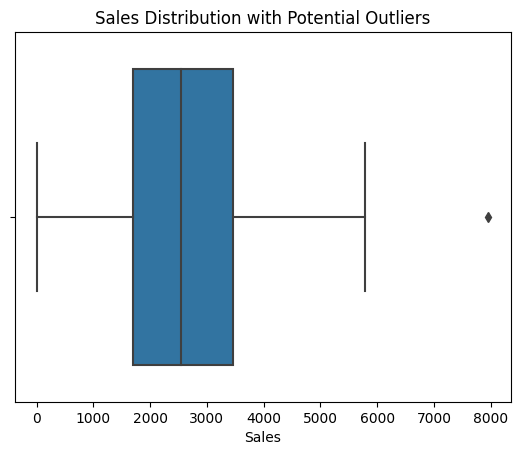

In [41]:
#check for outliers in sales
sns.boxplot(global_store_df['Sales'])
plt.title('Sales Distribution with Potential Outliers')
plt.show()

In [42]:
#Investigate the sales more as we found above a potential outlier
median_sales = global_store_df['Sales'].median()
print(f"Median Sales: {median_sales}")

Median Sales: 2546.26


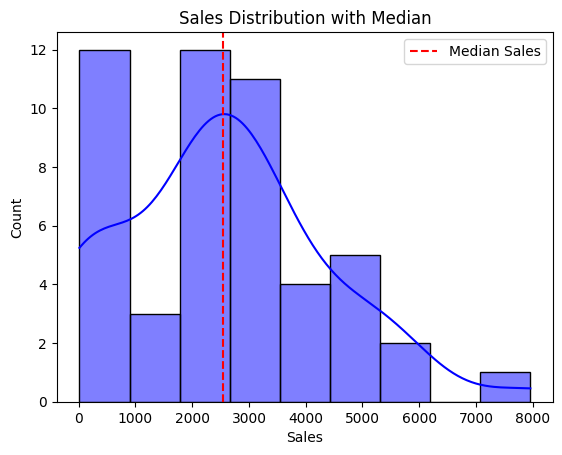

In [43]:
#show histogram plot for sales column with median
sns.histplot(global_store_df['Sales'], kde=True, color='blue')
plt.axvline(global_store_df['Sales'].median(), color='red', linestyle='--', label='Median Sales')
plt.legend()
plt.title('Sales Distribution with Median')
plt.show()

In [44]:
#As it's only one unrealestic value in the sales from my persepctive, I will just leave it as is.

In [45]:
#Investigate negative profits
negative_profit = global_store_df[global_store_df['Profit'] < 0]
print(negative_profit)

    Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
1    26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
3    13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
16   39519  CA-2012-AB10015140-40958 2012-02-19 2012-02-25  Standard Class   
30     220   US-2012-RR1952536-41270 2012-12-27 2012-12-29    Second Class   
40   21316   ID-2014-JB1600059-41873 2014-08-22 2014-08-26  Standard Class   

     Customer ID     Customer Name      Segment Postal Code           City  \
1      JR-162107     Justin Ritter    Corporate     Unknown     Wollongong   
3     KM-1637548  Katherine Murray  Home Office     Unknown         Berlin   
16  AB-100151402     Aaron Bergman     Consumer     76017.0      Arlington   
30    RR-1952536         Rick Reed    Corporate     Unknown  Santo Domingo   
40    JB-1600059         Joy Bell-     Consumer     Unknown        Mataram   

    ... Sub-Category                               Product Nam

---

In [46]:
#found 4 negative values so I will drop them for now
global_store_df = global_store_df[global_store_df['Profit'] >= 0]
#Investigate negative profits
negative_profit = global_store_df[global_store_df['Profit'] < 0]
print(negative_profit)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Postal Code, City, State, Country, Region, Market, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority, Shipping Duration, Profit Margin]
Index: []

[0 rows x 26 columns]


In [47]:
#show data sample after cleaning and preparation
global_store_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipping Duration,Profit Margin
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2,27.998018
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Unknown,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,1,17.776614
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Unknown,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,1,10.996272
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,Unknown,Sydney,...,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,897.35,Critical,3,26.663127
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,Unknown,Porirua,...,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,894.77,Critical,2,30.999737
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,Unknown,Hamilton,...,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High,4,18.999245
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,2,15.998947
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High,1,11.250257
10,36259,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,Art,Newell 330,17.94,3,0.0,4.66,4.29,High,1,25.975474
11,28879,ID-2013-AJ107801-41383,2013-04-19,2013-04-22,First Class,AJ-107801,Anthony Jacobs,Corporate,Unknown,Kabul,...,Tables,"Bevis Conference Table, Fully Assembled",4626.15,5,0.0,647.55,835.57,High,3,13.997601


In [49]:
#Show the data types after updating it to the correct ones
global_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 49
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             45 non-null     int64         
 1   Order ID           45 non-null     object        
 2   Order Date         45 non-null     datetime64[ns]
 3   Ship Date          45 non-null     datetime64[ns]
 4   Ship Mode          45 non-null     category      
 5   Customer ID        45 non-null     object        
 6   Customer Name      45 non-null     object        
 7   Segment            45 non-null     category      
 8   Postal Code        45 non-null     object        
 9   City               45 non-null     object        
 10  State              45 non-null     object        
 11  Country            45 non-null     object        
 12  Region             45 non-null     category      
 13  Market             45 non-null     category      
 14  Product ID  

In [50]:
#overview of the data
global_store_df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Shipping Duration,Profit Margin
count,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,27061.00000,2559.217556,6.355556,0.043333,643.805111,568.329689,2.200000,24.012868
std,13037.39862,1850.023078,3.163395,0.070389,719.671821,323.401112,1.486301,12.864885
min,1570.00000,17.940000,1.000000,0.000000,4.660000,1.280000,0.000000,1.106958
25%,15953.00000,1713.840000,4.000000,0.000000,110.340000,634.529000,1.000000,13.997583
50%,28046.00000,2526.930000,6.000000,0.000000,526.500000,689.800000,2.000000,24.994066
75%,36651.00000,3473.140000,8.000000,0.100000,818.280000,766.930000,3.000000,31.760353
max,49463.00000,7958.580000,14.000000,0.200000,3979.080000,915.490000,6.000000,49.997361


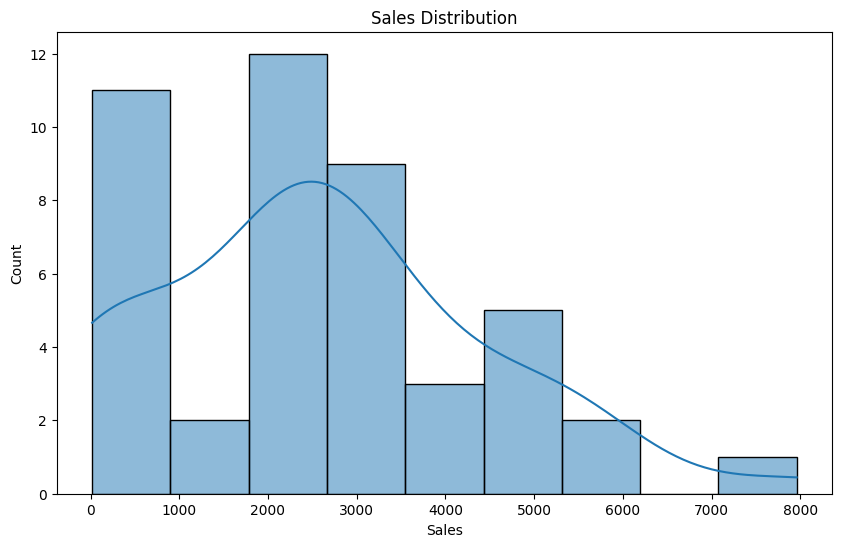

In [52]:
#  Histogram Plot the Sales
plt.figure(figsize=(10, 6))
sns.histplot(global_store_df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

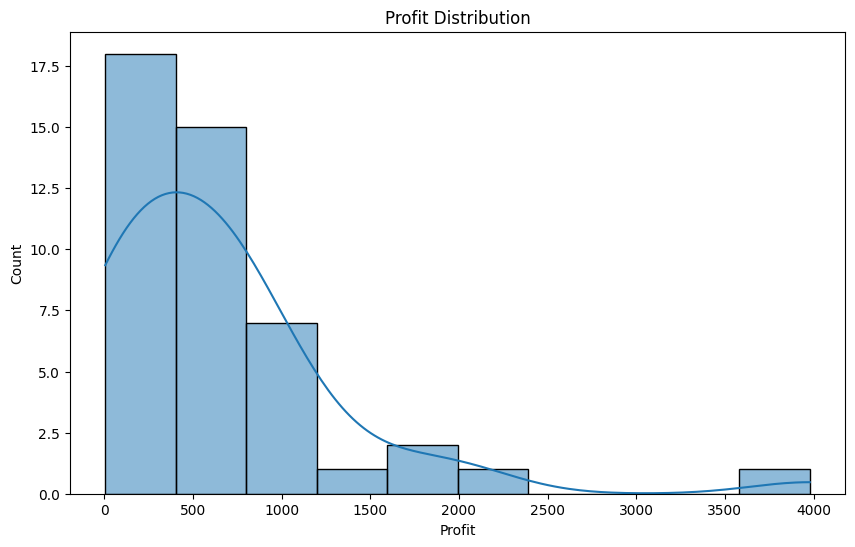

In [53]:
# Histogram Plot the Profit
plt.figure(figsize=(10, 6))
sns.histplot(global_store_df['Profit'], kde=True)
plt.title('Profit Distribution')
plt.show()


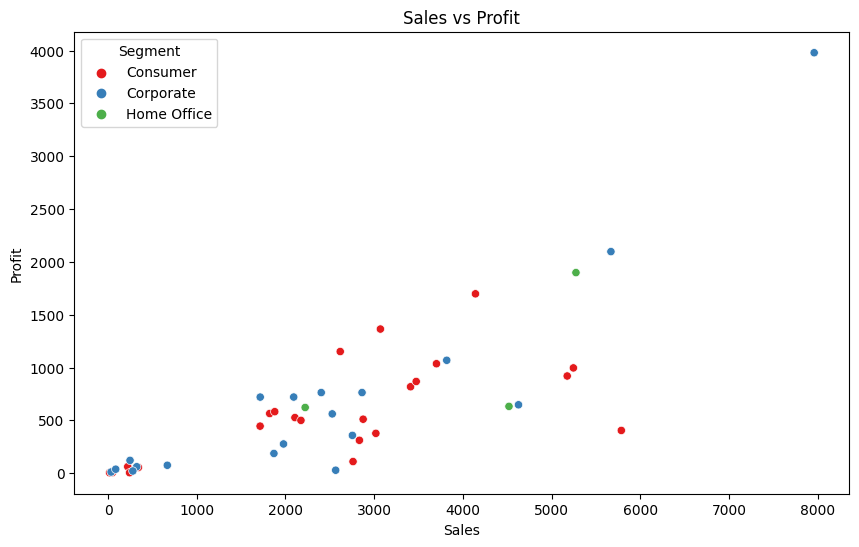

In [54]:
# Scatter plot sales vs profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=global_store_df, x='Sales', y='Profit', hue='Segment', palette='Set1')
plt.title('Sales vs Profit')
plt.show()

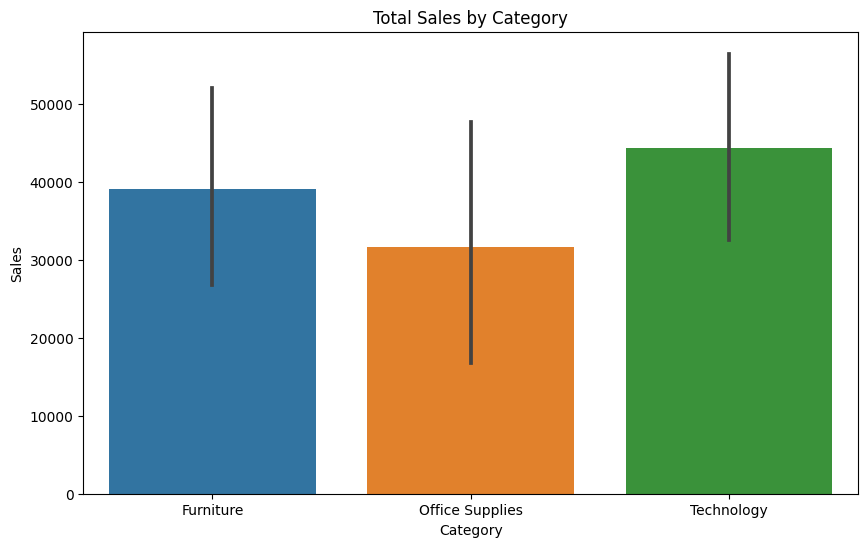

In [ ]:
# Total sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=global_store_df, estimator=sum)
plt.title('Total Sales by Category')
plt.show()

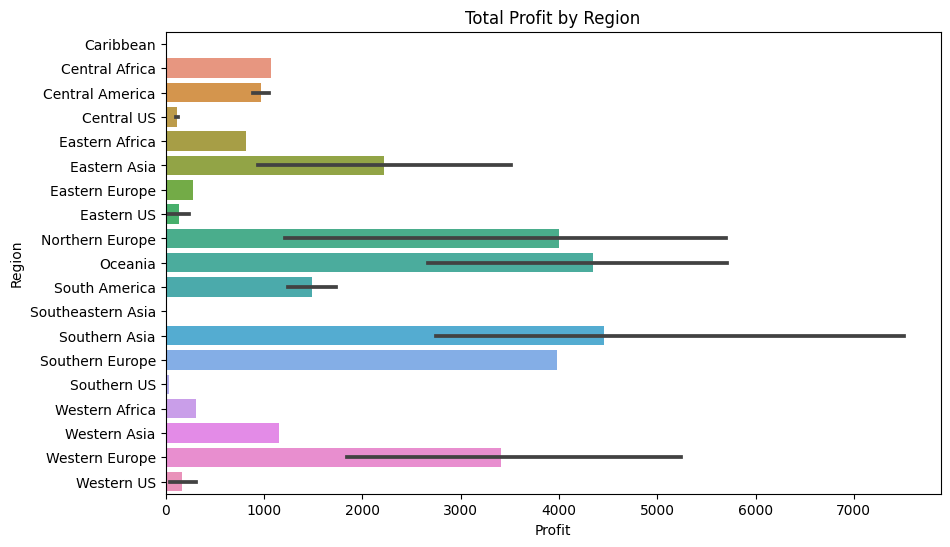

In [ ]:
#Profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=global_store_df, estimator=sum)
plt.title('Total Profit by Region')
plt.show()

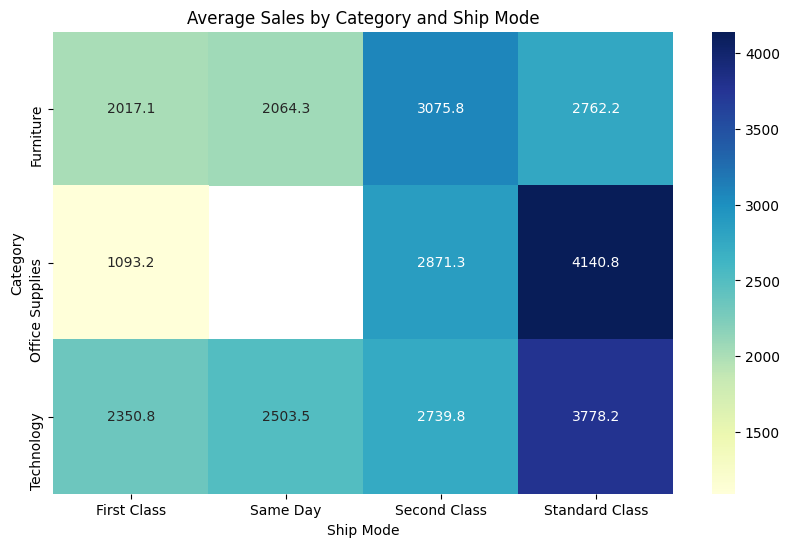

In [61]:
category_shipmode_sales = global_store_df.groupby(['Category', 'Ship Mode'])['Sales'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(category_shipmode_sales, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Sales by Category and Ship Mode')
plt.show()

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [7]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (553063055.py, line 5)